In [2]:
# Feed Forward Neural Networks and GPUs Utilization

In [3]:
# How to use GPUs

In [5]:
!pip install jovian --upgrade -q
import jovian 

     |████████████████████████████████| 68 kB 3.2 MB/s 


In [6]:
# You can also you Kaggle 
# MNIST Dataset - The goal is to identified each image digit using different ML Techniques 
# Today we will implent the Feed Forward Neural Network which will exacly be using the  Deep lEARNING CONECEPTS 1

In [7]:
'''
What is the FeedForward Neural Network ? 
It will try to capture the Non-Linear Relationship 
PIL images used by the Python Image Libraries 
'''

'\nWhat is the FeedForward Neural Network ? \nIt will try to capture the Non-Linear Relationship \nPIL images used by the Python Image Libraries \n'

In [8]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from keras.datasets import mnist
%matplotlib inline


In [9]:
dataset = MNIST(root='/data', download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



In [10]:
len(dataset)

60000

In [11]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
image, label = dataset[0]
image.shape
# The dimension represents color Channel, Width and height 


torch.Size([1, 28, 28])

In [13]:
image.permute(1,2,0).shape


torch.Size([28, 28, 1])

In [14]:
image, label = dataset[0]
print('image shape', image.shape)

image shape torch.Size([1, 28, 28])


Label:  5
torch.Size([28, 28])


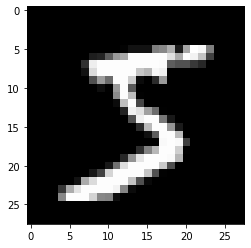

In [15]:
plt.imshow(image[0],cmap='gray')
print("Label: ", label)
print(image[0].shape)

In [16]:
# Next Set is to use a Random Split Function to create the validation set of your Data 
val_size = 10000
train_size = len(dataset) - val_size 
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [17]:
# We now create the Data Loader since we need Batch Size 
batch_size = 128 

In [18]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4,pin_memory=True)
val_loader = DataLoader(val_ds, batch_size )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [19]:
for images,_ in train_loader:
  print('Image Shape:', images.shape)
  print('Grid Shape:', make_grid(images, nrow=16).shape)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Image Shape: torch.Size([128, 1, 28, 28])
Grid Shape: torch.Size([3, 242, 482])


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Image Shape: torch.Size([128, 1, 28, 28])


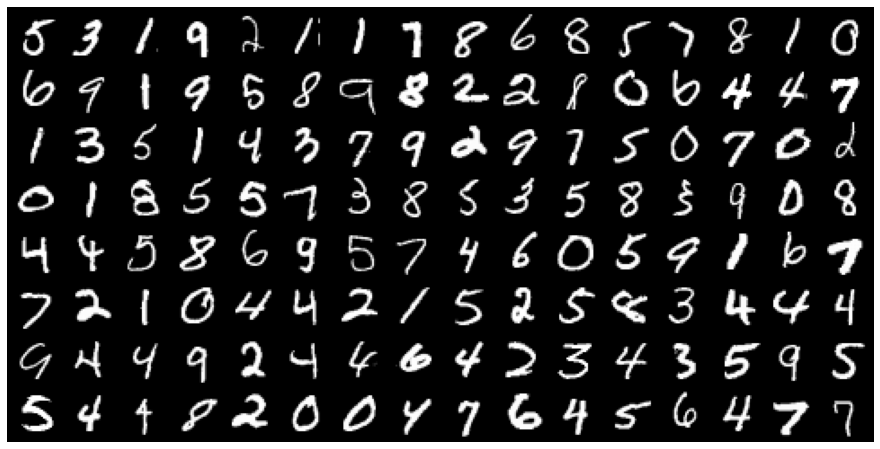

In [20]:
for images,_ in train_loader:
  print('Image Shape:', images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=16).permute((1,2,0)))
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Image Shape: torch.Size([128, 1, 28, 28])


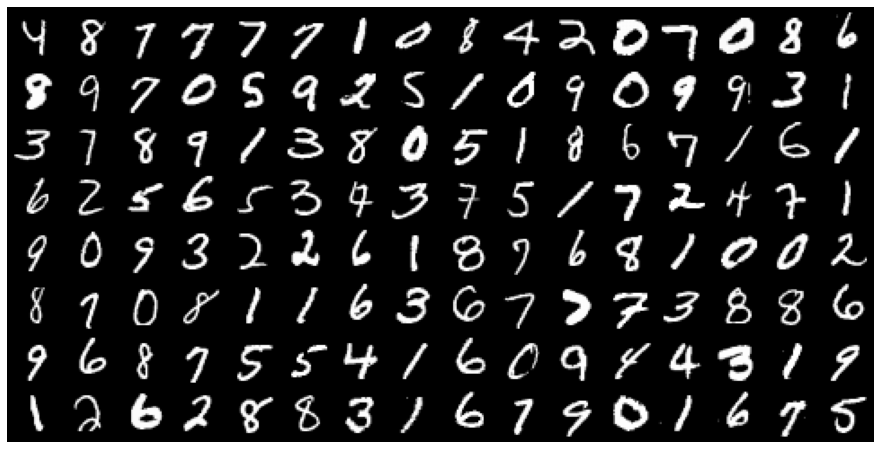

In [21]:
for images,_ in train_loader:
  print("Image Shape:", images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
  break

In [18]:
# Hidden Layer, Non-Linearity, Activation Functions 
# Wehave to identify the Non -linearity between the Layers 

In [22]:
for images, labels in train_loader:
  print('Images Shape:', images.shape)
  inputs = images.reshape(-1, 784)
  print('Input Shape', inputs.shape)
  break 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Images Shape: torch.Size([128, 1, 28, 28])
Input Shape torch.Size([128, 784])


In [20]:
'''
We will create the nn.linear object which will create a nn.Linear object 
'''

'\nWe will create the nn.linear object which will create a nn.Linear object \n'

In [23]:
input_size = inputs.shape[-1]
hidden_size = 32

In [24]:
# WE next create a nn.Linear 
layer1 =  nn.Linear(input_size, hidden_size)

In [22]:
# We can now Process Immediate output for the batch of the images through Layer 1

In [25]:
inputs.shape 

torch.Size([128, 784])

In [24]:
# The Image vector of size 784 are transformed into intermediate output vector of length 32 
# by performing the matrix multiplication of input matrix with the transposed weigt matrix of layer1  and adding the bias to it

In [26]:
layers1_outputs = layer1(inputs)
print('Layers1_output_shape', layers1_outputs.shape)

Layers1_output_shape torch.Size([128, 32])


In [26]:
'''
The image vector of size 784 are transformed into intermediate output vector of length 32 
by performing matrix multiplication of input matrix of laeyr1 and adding the bias.
'''

'\nThe image vector of size 784 are transformed into intermediate output vector of length 32 \nby performing matrix multiplication of input matrix of laeyr1 and adding the bias.\n'

In [27]:
layer1_outputs_direct = inputs@layer1.weight.t() + layer1.bias 
layer1_outputs_direct.shape 

torch.Size([128, 32])

In [28]:
torch.allclose(layers1_outputs, layer1_outputs_direct, 1e-3)

True

In [ ]:
# Thus linear input have a linear Relationships , 
# thus even if we change the weight and Biases layer1 can only capture the linear relationships between inputs and outputs 

In [ ]:
# What iS RELU - A non Linear Function Used for the inputs of the layer1 
# It replaces the negative values to 0 

In [29]:
# All its doing is to remove the negative values and retaining the positive Values 
F.relu(torch.tensor([[1, 0, -1.1],[0.2, -0.333, 2]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 2.0000]])

In [30]:
output_size = 10
layer2 = nn.Linear(hidden_size , output_size)

In [31]:
# Applying the Activation function to the outputs of the layers_1 
relu_outputs = F.relu(layers1_outputs)
print('(min(layer1_outputs)):', torch.min(layers1_outputs).item())
print('(min(relu_outputs)):', torch.min(relu_outputs).item())

(min(layer1_outputs)): -0.7127912640571594
(min(relu_outputs)): 0.0


In [32]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)


torch.Size([128, 10])


In [33]:
layers1_outputs.shape

torch.Size([128, 32])

In [34]:
relu_outputs = F.relu(layers1_outputs)
print('Relu_Outputs', relu_outputs.shape)
print('min(layers1_outputs)',torch.min(layers1_outputs).item())
print('min(Relu_outputs)',torch.min(relu_outputs).item())

Relu_Outputs torch.Size([128, 32])
min(layers1_outputs) -0.7127912640571594
min(Relu_outputs) 0.0


In [35]:
# Now we know that Relu Inputs and Outputs have non-Linear relationship 
# We called Relu as a Non-Linear Activation Function, because each input certain output is activated (those with non-zero and other are turned off)

In [36]:
output_size = 10 
# Hidden layer past throught he First Layer
layer2 = nn.Linear(hidden_size, output_size)

In [37]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [38]:
inputs.shape

torch.Size([128, 784])

In [39]:
relu_outputs.shape

torch.Size([128, 32])

In [40]:
inputs.shape

torch.Size([128, 784])

In [71]:
'''
As expected layers2_ouput contains a batch of vector of size 10, we can now use this output to compute the loss using F.cross_entropy 
and adjust the layer using gradient descent 1 and gradient descent 2
'''

'\nAs expected layers2_ouput contains a batch of vector of size 10, we can now use this output to compute the loss using F.cross_entropy \nand adjust the layer using gradient descent 1 and gradient descent 2\n'

In [41]:
# We will perform the Gradient Desent 
F.cross_entropy(layer2_outputs, labels)

tensor(2.3342, grad_fn=<NllLossBackward0>)

In [42]:
# Expanding version of the Layer_2 
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [43]:
torch.allclose(outputs, layer2_outputs, 1e-3)

True

In [ ]:
# Some Application of the Neural Networks 
# Deep Learning Network is complex version of the feedforward network 

In [ ]:
# It can be useful for cases like:
# 1. if an image contains the cat or a dog 
# 2. Identifying the genre of the songs based upon the 10 Seconds songs 
# 3. Navigating the self driving car using the video feed on the road 
# 4. Converting soeech recording to the Text and vice versa 

In [ ]:
# Deep Learning network often have millions of Parameters which can capture far more information than the human brain can do.


In [44]:
# same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias 

In [45]:
# Create a single layer to replace the two layers 
combined_layer = nn.Linear(input_size, output_size)
combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [46]:
# Same as the Combined Data 
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias 

In [47]:
torch.allclose(outputs2, outputs3, 1e-3)

True

In [ ]:
# Non Linear Relationships

In [ ]:
# Defining our model by extending the nn.module class 


In [48]:
class MnistModel(nn.Module):

    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
      # Calculate the loss in the training Data for the batch of training Data 
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


        

In [49]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [50]:
# We create the model with hidden layers with 32 activations 
input_size = 784 
hidden_size = 32
num_classes = 10 


In [51]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [52]:
# Lets Take a look at the model Parameters , We expect to see the Weight and Bias Matrix for each one of the Layers 

In [53]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [54]:
for mages, labels in train_loader:
  outputs = model(images)
  loss = F.cross_entropy(outputs, labels)
  print('Loss :', loss.item())
  break

loss = F.cross_entropy(outputs, labels)
print('Loss: ',loss.item() )
print('Output Shape: ', outputs.shape)
print("Sample Output :\n", outputs[:2].data)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loss : 2.3199269771575928
Loss:  2.3199269771575928
Output Shape:  torch.Size([128, 10])
Sample Output :
 tensor([[ 0.0452,  0.0250, -0.1674, -0.0696,  0.1046, -0.1781,  0.1198, -0.0303,
         -0.1800,  0.1427],
        [ 0.0719,  0.0747, -0.1584, -0.0828,  0.0874, -0.1569,  0.1357,  0.0202,
         -0.1105,  0.1658]])


In [ ]:
# You need a Nvidia CUDA Driver installed to use the GPUs 

# USING A **GPU**

In [ ]:
# lets try and generate some output using our model, we will take first batch 128 image from the dataset 
# Pass them into our model 

In [55]:
torch.cuda.is_available()

True

In [56]:
def get_default_device():
  "pick the GPU else choose the CPU"
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [57]:
device = get_default_device()
device

device(type='cuda')

In [58]:
# Now let define the function that can move data and model to choosen device 
def to_device(data, device):
  "Move Tensor to the Choosen Data"
  if isinstance(data,(list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)


In [59]:
for images, labels in train_loader:
  print(images.shape)
  images = to_device(images, device)
  print(images.device)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
cuda:0


In [60]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device) # here we move the data to the specific Device 

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [61]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [62]:
for xb, yb in val_loader:
  print('xb.device', xb.device)
  print('yb:', yb)
  break

xb.device cuda:0
yb: tensor([2, 2, 4, 3, 6, 6, 8, 6, 8, 2, 2, 4, 2, 9, 3, 1, 0, 1, 7, 3, 9, 0, 6, 0,
        4, 2, 8, 5, 8, 6, 9, 6, 9, 0, 5, 2, 4, 0, 7, 5, 8, 1, 7, 9, 0, 8, 4, 3,
        1, 1, 7, 9, 8, 4, 7, 0, 7, 5, 2, 4, 3, 3, 9, 8, 1, 1, 1, 7, 6, 3, 0, 5,
        2, 1, 4, 9, 9, 3, 0, 7, 4, 3, 3, 9, 1, 2, 9, 4, 6, 8, 6, 0, 8, 9, 7, 9,
        1, 7, 5, 5, 8, 3, 2, 6, 5, 3, 6, 4, 7, 0, 9, 9, 1, 8, 3, 9, 3, 4, 8, 2,
        9, 8, 6, 9, 3, 4, 1, 3], device='cuda:0')


In [ ]:
'''We'll define two functions: fit and evaluate to train the model 
   using gradient descent and evaluate its performance on the
   validation set. For a detailed walkthrough of these functions, check out the previous tutorial.'''

# Training Data

In [63]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)

    for epoch in range(epochs):

        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward() # Differentiation 
            optimizer.step()
            optimizer.zero_grad()

        # Validation Phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [64]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [65]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [66]:
history = [evaluate(model, val_loader)]
history

[{'val_acc': 0.06259889155626297, 'val_loss': 2.3091938495635986}]

In [67]:
# Let's train the model for five epochs and look at the results. We can use a relatively high learning rate of 0.5.

In [68]:
history += fit(5, 0.5, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 0.2552, val_acc: 0.9251
Epoch [1], val_loss: 0.1908, val_acc: 0.9437
Epoch [2], val_loss: 0.1541, val_acc: 0.9590
Epoch [3], val_loss: 0.1637, val_acc: 0.9524
Epoch [4], val_loss: 0.1513, val_acc: 0.9571


In [69]:
# Decreasing the Learning rate , 96% is pretty good! Let's train the model for five more epochs at a lower learning rate of 0.1 to improve the accuracy further.

history += fit(5, 0.1, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 0.1247, val_acc: 0.9639
Epoch [1], val_loss: 0.1229, val_acc: 0.9636
Epoch [2], val_loss: 0.1219, val_acc: 0.9648
Epoch [3], val_loss: 0.1211, val_acc: 0.9638
Epoch [4], val_loss: 0.1204, val_acc: 0.9653


# **We can now plot the losses & accuracies to study how the model improves over time.**

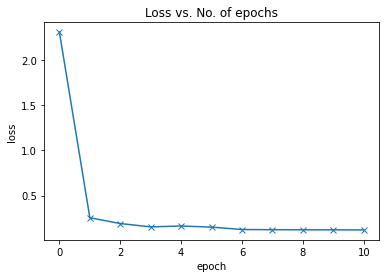

In [70]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

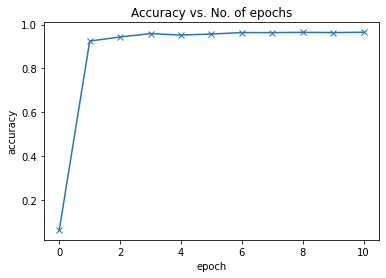

In [71]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [ ]:
'''
  Our current model outperforms the logistic regression model (which could
  only achieve around 86% accuracy) by a considerable margin!
  It quickly reaches an accuracy of 97% but doesn't improve much beyond this. 
  To improve accuracy further, we need to make the model more powerful by increasing the hidden 
  layer's size or adding more hidden layers with activations. I encourage you to try out both these approaches and see which one works better.
'''

In [72]:
!pip install jovian --upgrade -q

In [73]:
import jovian

In [89]:
jovian.commit(project='04-feedforward-nn', environment=None)

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


In [76]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=ToTensor(),
                     download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [81]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

In [ ]:
# GPU has a different memeory than the rAM of the computer 

Label: 7 Predicted


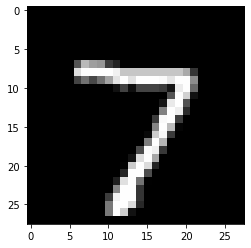

In [78]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted', )

Label: 2 Predicted


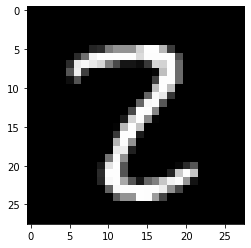

In [83]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted', )

Label: 9 Predicted


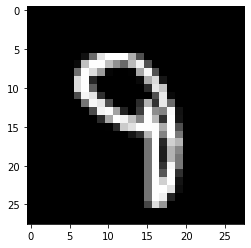

In [84]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted', )

In [88]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
# Device Data Loader- to move the Data on the Device 
result = evaluate(model, test_loader)
result

{'val_acc': 0.969433605670929, 'val_loss': 0.10235575586557388}

In [ ]:
# The overall accuracy and prediction of the Dataset
# Test_accuracy , Test_loss 
# TRAIN Deep Neural Network 

In [ ]:
# You Can Use Fashion MNIST Dataset - Conating the Images of Shoes, Bags, and 10 different Things 

In [ ]:
# To get the same result with the Dataset 

In [ ]:
# Practice on Deep Neural Networks 

In [ ]:
'''
Next is the Convolutional Neural Network that uses Spatial invariance 
'''